In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
(xTrain, _), (xTest, _) = fashion_mnist.load_data()

In [4]:
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

In [5]:
input_shape = xTrain.shape[1] * xTrain.shape[2]

In [6]:
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
encoder = Sequential()

encoder.add(Flatten(input_shape= [xTrain.shape[1], xTrain.shape[2]]))
encoder.add(Dense(units= 400, activation= 'relu'))
encoder.add(Dense(units= 200, activation= 'relu'))
encoder.add(Dense(units= 100, activation= 'relu'))
encoder.add(Dense(units= 50, activation= 'relu'))

encoder.add(Dense(units= 25, activation= 'relu')) # that's bottleneck - darboğaz

Metal device set to: Apple M1


2022-08-03 23:12:43.011279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-03 23:12:43.011369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
Total params: 420,625
Trainable params: 420,625
Non-trainable params: 0
__________________________________________________

In [9]:
decoder = Sequential()

decoder.add(Dense(units= 50, input_shape= [25], activation= 'relu'))
decoder.add(Dense(units= 100, activation= 'relu'))
decoder.add(Dense(units= 200, activation= 'relu'))
decoder.add(Dense(units= 400, activation= 'relu'))
decoder.add(Dense(units= input_shape, activation= 'sigmoid'))
decoder.add(Reshape([xTrain.shape[1], xTrain.shape[2]]))

In [10]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 421,384
Trainable params: 421,384
Non-trainable params: 0
________________________________________________

In [11]:
aen = Sequential([encoder, decoder])

In [12]:
aen.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 25)                420625    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [13]:
aen.compile(loss= 'binary_crossentropy', optimizer= SGD(learning_rate= 1.5), 
            metrics= ['accuracy'])

In [14]:
aen.fit(xTrain, xTrain, validation_data= (xTest, xTest), epochs= 5)

Epoch 1/5


2022-08-03 23:12:43.143878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-03 23:12:43.144043: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   7/1875 [..............................] - ETA: 16s - loss: 0.6925 - accuracy: 0.0384  

2022-08-03 23:12:43.370093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.4061 - accuracy: 0.0623

2022-08-03 23:12:57.797799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.4059 - accuracy: 0.0623 - val_loss: 0.3367 - val_accuracy: 0.0793
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3284 - accuracy: 0.0881 - val_loss: 0.3211 - val_accuracy: 0.0990
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3148 - accuracy: 0.0986 - val_loss: 0.3097 - val_accuracy: 0.1007
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3079 - accuracy: 0.1073 - val_loss: 0.3100 - val_accuracy: 0.1002
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3041 - accuracy: 0.1146 - val_loss: 0.3027 - val_accuracy: 0.1202


In [15]:
lossHistory = pd.DataFrame(aen.history.history)

In [16]:
lossHistory

,loss,accuracy,val_loss,val_accuracy
0,0.405942,0.062341,0.336669,0.079254
1,0.328437,0.088076,0.321078,0.098993
2,0.314825,0.098570,0.309724,0.100704
3,0.307919,0.107255,0.310002,0.100250
4,0.304103,0.114605,0.302659,0.120179


<AxesSubplot:>

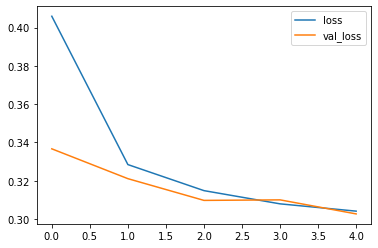

In [18]:
lossHistory[['loss', 'val_loss']].plot()

<AxesSubplot:>

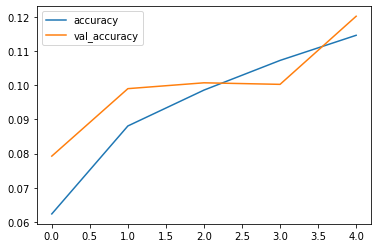

In [19]:
lossHistory[['accuracy', 'val_accuracy']].plot()